 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")


whale_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(ascending=True, inplace=True)

whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True, inplace=True)


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(ascending=True, inplace=True)

sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)

sp500_df.dtypes

sp500_df.head()



,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Calculate Daily Returns

sp_500_daily_returns = sp500_df.pct_change()


sp_500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop nulls
sp_500_daily_returns.dropna(inplace=True)

In [15]:
# Rename Column
sp_500_daily_returns = sp_500_daily_returns.rename(columns={"Close":"S&P 500"})

sp_500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp_500_daily_returns], axis ="columns", join = "inner")
combined_df.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

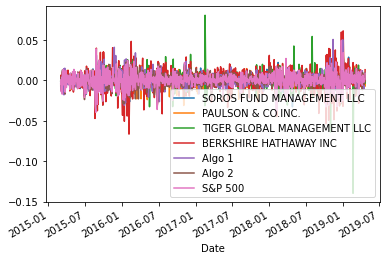

In [17]:
# Plot daily returns
combined_df.plot()

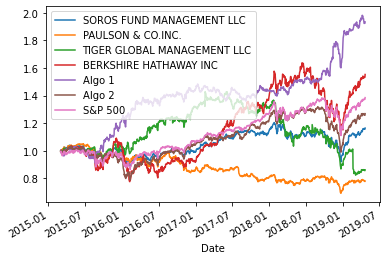

In [18]:
# Plot cumulative returns
# like the $10000 example on Saturday 

cumulative_returns = (1+combined_df).cumprod()

cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

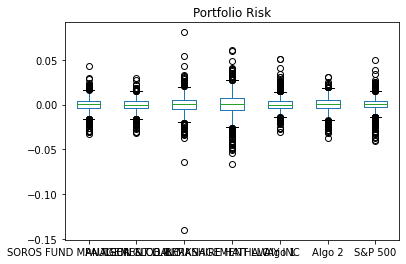

In [19]:
# Box plot to visually show risk 
# YOUR CODE HERE box and whisker plot (look up command for that type of plot)

combined_df.plot.box(title="Portfolio Risk")

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_df_std = combined_df.std().sort_values(ascending=True)
print(combined_df_std)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [44]:
# Determine which portfolios are riskier than the S&P 500 

sp500_std=combined_df["S&P 500"].std()
combined_df_std>sp500_std



PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [55]:
# Calculate the annualized standard deviation (252 trading days)

ann_sd_combined_df = combined_df_std * np.sqrt(252)

ann_sd_combined_df

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

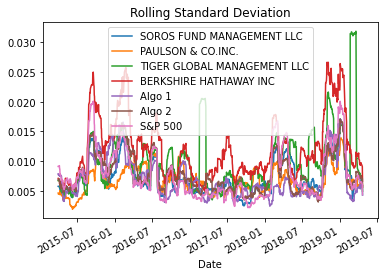

In [56]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_std_combined_df = combined_df.rolling(window=21).std()
print(rolling_std_combined_df)

rolling_std_combined_df.plot(title="Rolling Standard Deviation")

In [57]:
# Construct a correlation table

combined_df_correlationmatrix= combined_df.corr()
print(combined_df_correlationmatrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

In [58]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)


cov_soros = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df["S&P 500"])
var_sp500 = combined_df["S&P 500"].var()

beta_soros = cov_soros/var_sp500

beta_soros

0.7733753547794652

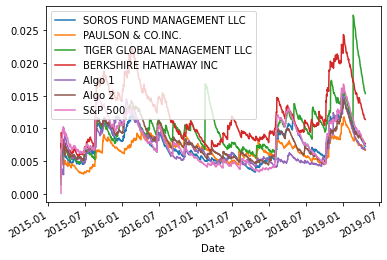

In [59]:
# Calculate a rolling window using the exponentially weighted moving average. 

rolling_expo_average = combined_df.ewm(halflife=21, adjust=True).std()

rolling_expo_average.plot()


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [60]:
# Calculate annualized Sharpe Ratios

sharpe_combined_df = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))

sharpe_combined_df

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

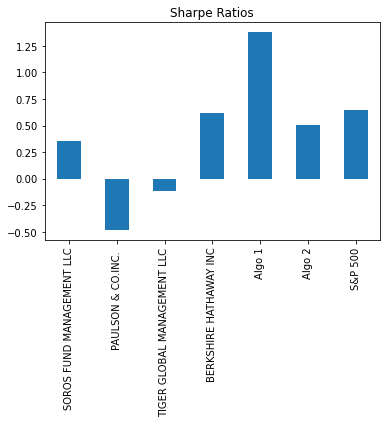

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_combined_df.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [62]:
# Read the first stock
cmg_csv = Path("Resources/CMG.csv")


cmg_df = pd.read_csv(cmg_csv, index_col = "Date", infer_datetime_format=True)
cmg_df.rename(columns={"Close":"CMG"}, inplace=True)

cmg_df.head()

,CMG
Date,
4/2/2018 16:00:00,311.16
4/3/2018 16:00:00,316.66
4/4/2018 16:00:00,325.84
4/5/2018 16:00:00,327.71
4/6/2018 16:00:00,318.07


In [63]:
# Read the second stock
cvs_csv = Path("Resources/cvs.csv")


cvs_df = pd.read_csv(cvs_csv, index_col = "Date", infer_datetime_format=True)
cvs_df.rename(columns={"Close":"CVS"}, inplace=True)
cvs_df.head()

,CVS
Date,
4/2/2018 16:00:00,61.04
4/3/2018 16:00:00,62.58
4/4/2018 16:00:00,64.28
4/5/2018 16:00:00,64.66
4/6/2018 16:00:00,63.38


In [64]:
# Read the third stock
sbux_csv = Path("Resources/sbux.csv")


sbux_df = pd.read_csv(sbux_csv, index_col = "Date", infer_datetime_format=True)
sbux_df.rename(columns={"Close":"SBUX"}, inplace=True)
sbux_df.head()

,SBUX
Date,
4/2/2018 16:00:00,56.24
4/3/2018 16:00:00,58.00
4/4/2018 16:00:00,58.83
4/5/2018 16:00:00,59.14
4/6/2018 16:00:00,58.34


In [65]:
# Concatenate all stocks into a single DataFrame
als_port_df=pd.concat([cmg_df, cvs_df, sbux_df], axis ="columns", join="inner")
als_port_df.head()

,CMG,CVS,SBUX
Date,,,
4/2/2018 16:00:00,311.16,61.04,56.24
4/3/2018 16:00:00,316.66,62.58,58.00
4/4/2018 16:00:00,325.84,64.28,58.83
4/5/2018 16:00:00,327.71,64.66,59.14
4/6/2018 16:00:00,318.07,63.38,58.34


In [66]:
# Reset the index to nothing

#als_port_df= als_port_df.set_index("", inplace=True)

als_port_df.reset_index()

,Date,CMG,CVS,SBUX
0,4/2/2018 16:00:00,311.16,61.04,56.24
1,4/3/2018 16:00:00,316.66,62.58,58.00
2,4/4/2018 16:00:00,325.84,64.28,58.83
3,4/5/2018 16:00:00,327.71,64.66,59.14
4,4/6/2018 16:00:00,318.07,63.38,58.34
...,...,...,...,...
626,9/24/2020 16:00:00,1229.28,56.71,83.04
627,9/25/2020 16:00:00,1244.50,57.32,84.30
628,9/28/2020 16:00:00,1263.35,57.94,86.07
629,9/29/2020 16:00:00,1261.61,57.54,84.80


In [73]:
# Pivot so that each column of prices represents a unique symbol

#als_port_df.pivot(index="Date", columns = ("CMG","CVS", "SBUX"))

als_port_pivot = pd.pivot_table(als_port_df, index='Date')

als_port_pivot

,CMG,CVS,SBUX
Date,,,
1/10/2019 16:00:00,509.62,65.55,64.19
1/10/2020 16:00:00,857.77,72.11,90.16
1/11/2019 16:00:00,506.95,65.81,63.73
1/13/2020 16:00:00,863.00,72.76,91.08
1/14/2019 16:00:00,501.99,65.34,63.37
...,...,...,...
9/6/2019 16:00:00,836.32,62.23,95.74
9/7/2018 16:00:00,482.03,77.29,54.86
9/8/2020 16:00:00,1299.75,59.53,85.41


In [74]:
# Drop Nulls
als_port_pivot.dropna()

,CMG,CVS,SBUX
Date,,,
1/10/2019 16:00:00,509.62,65.55,64.19
1/10/2020 16:00:00,857.77,72.11,90.16
1/11/2019 16:00:00,506.95,65.81,63.73
1/13/2020 16:00:00,863.00,72.76,91.08
1/14/2019 16:00:00,501.99,65.34,63.37
...,...,...,...
9/6/2019 16:00:00,836.32,62.23,95.74
9/7/2018 16:00:00,482.03,77.29,54.86
9/8/2020 16:00:00,1299.75,59.53,85.41


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns use dot functions
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE